## 매트플롯립 입문

### 설치

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [2]:
# 기본 설정값 변경

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
# 필요에 따라 설정할 때는, plt.legend(fontsize=14)
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
# 필요에 따라 설정할 때는, plt.figure(figsize=(6,6))
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 공통 사전 처리
# 부록 3을 제외한 모든 노트북에는 위 셀과 통합되어 있음

# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

### plt를 사용한 간이 도식화

#### 산포도

In [5]:
# 데이터 준비
import seaborn as sns
df_iris = sns.load_dataset("iris")

# 결과 확인
print(df_iris.head())

# 산포도의 x좌표용 배열
xs = df_iris['sepal_length'].values

# 산포도의 y좌표용 배열
ys = df_iris['sepal_width'].values

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [7]:
df_iris['petal_length']
# DataFrame (행렬 구조) 형태 / 인덱스 있고, 기본은 Series


,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [8]:
df_iris['petal_length'].index

RangeIndex(start=0, stop=150, step=1)

In [9]:
df_iris['petal_length'].values

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

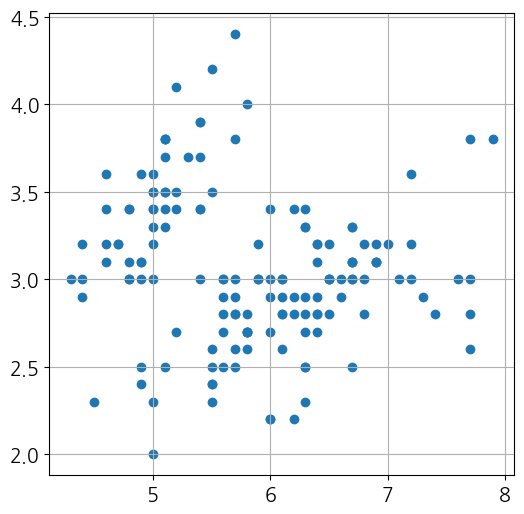

In [6]:
# 산포도 그리기
plt.scatter(xs, ys)

# 출력
plt.show()

#### 함수 그래프

In [10]:
# 데이터 준비

# 시그모이드 함수 정의
def sigmoid(x, a):
    return 1/(1 + np.exp(-a*x))

# 그래프를 그리기 위한 x좌표 리스트
xp = np.linspace(-3, 3, 61)
yp = sigmoid(xp, 1.0)
yp2 = sigmoid(xp, 2.0)

#### 단순한 예

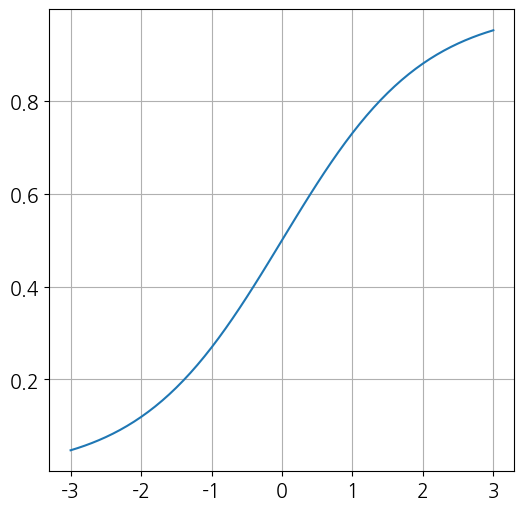

In [11]:
# 그래프 그리기
plt.plot(xp, yp)

# 출력
plt.show()

#### 복잡한 예

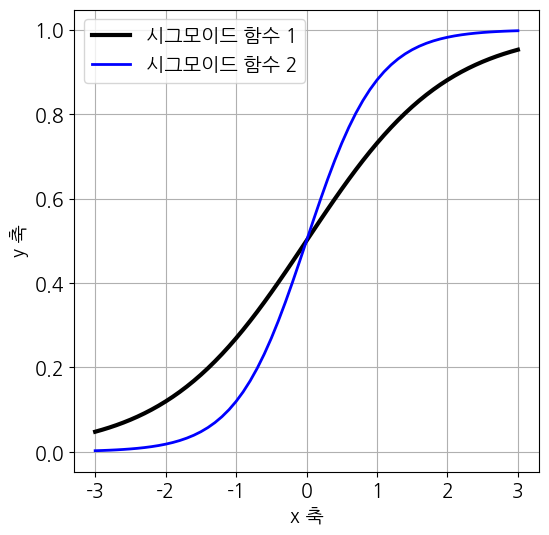

In [12]:
# 라벨을 포함한 그래프 출력 #1
plt.plot(xp, yp,
         label='시그모이드 함수 1', lw=3, c='k')

# 라벨을 포함한 그래프 출력 #2
plt.plot(xp, yp2,
         label='시그모이드 함수 2', lw=2, c='b')

# 범례 표시
plt.legend()

# 축 표시
plt.xlabel('x 축')
plt.ylabel('y 축')

# 출력
plt.show()

### subplot을 사용한 그래프 동시 출력

In [13]:
# 데이터 준비

# 손글씨 숫자 데이터
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,as_frame=False)

# 이미지 데이터
image = mnist.data
# 정답 데이터
label = mnist.target

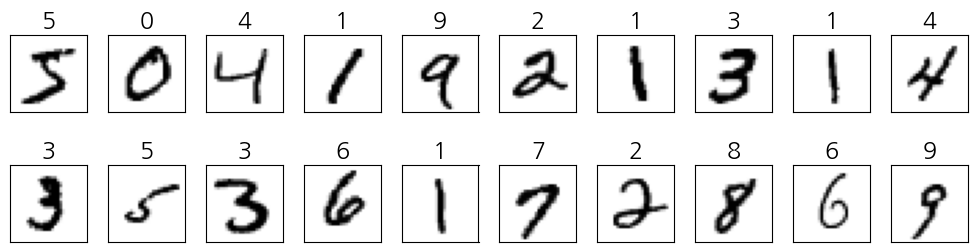

In [14]:
# 사이즈 지정
plt.figure(figsize=(10, 3))

# 20개 이미지를 표시
for i in range(20):

    # i번째 ax 변수 취득
    ax = plt.subplot(2, 10, i+1)

    # i번째 이미지 데이터를 취득한 다음 28x28로 변환
    img = image[i].reshape(28,28)

    # img를 이미지로 표시
    ax.imshow(img, cmap='gray_r')

    # 정답 데이터를 타이틀로 표시
    ax.set_title(label[i])

    # x, y 눈금 표시하지 않음 / 빈 리스트로 재정의
    ax.set_xticks([])
    ax.set_yticks([])

# 인접 객체와 겹치지 않도록 함
plt.tight_layout()

# 출력
plt.show()

In [16]:
x = [1,2,3,4]
print(x)
x =[]
print(x)

[1, 2, 3, 4]
[]
